In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

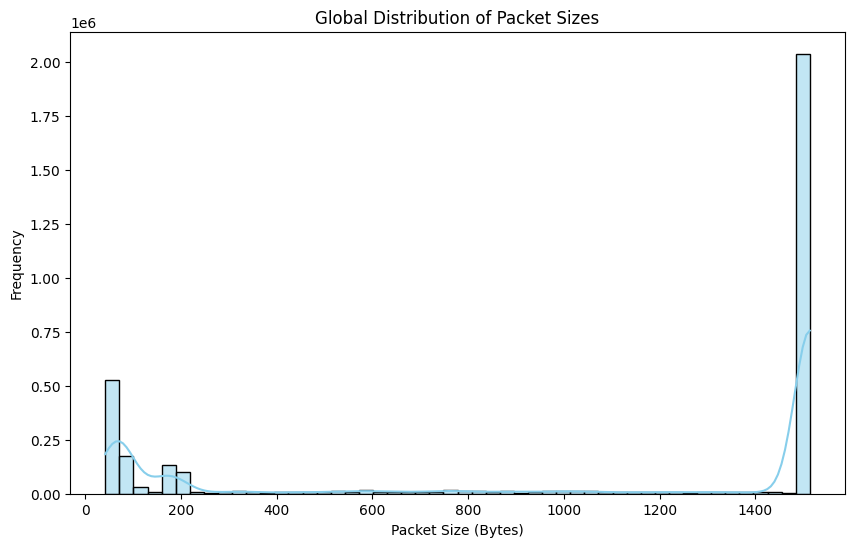

In [2]:
data = pd.read_csv("/Users/c22105357/Documents/gotham-network-packet-labeller/data/raw/normal/all_packet_sizes.txt", header=0)

# Plot histogram and KDE for packet sizes
plt.figure(figsize=(10, 6))
sns.histplot(data['70'], bins=50, kde=True, color='skyblue', edgecolor='black')

# Labeling the plot
plt.title("Global Distribution of Packet Sizes")
plt.xlabel("Packet Size (Bytes)")
plt.ylabel("Frequency")
plt.show()

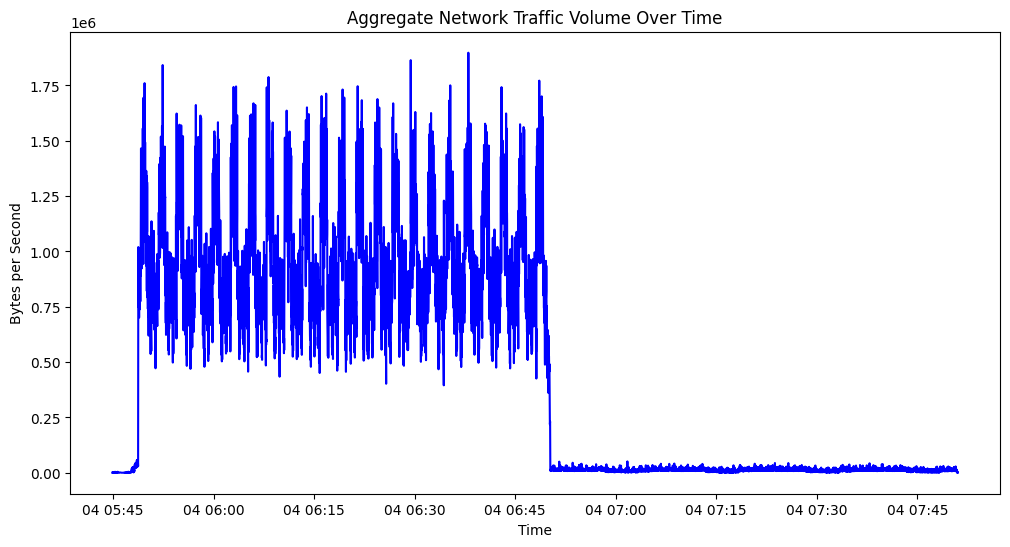

In [3]:
# Load data from the text file
data = pd.read_csv("/Users/c22105357/Documents/gotham-network-packet-labeller/data/raw/normal/all_traffic_data.txt")

# Convert timestamps to seconds and round down to the nearest second
data['timestamp'] = data['timestamp'].astype(float).astype(int)

# Group by timestamp (per second) and sum packet sizes within each second
traffic_volume = data.groupby('timestamp')['packet_size'].sum().reset_index()
traffic_volume.columns = ['timestamp', 'bytes_per_second']

# Convert timestamp to datetime for easier plotting
traffic_volume['timestamp'] = pd.to_datetime(traffic_volume['timestamp'], unit='s')

# Plot traffic volume over time
plt.figure(figsize=(12, 6))
plt.plot(traffic_volume['timestamp'], traffic_volume['bytes_per_second'], color='blue')
plt.title("Aggregate Network Traffic Volume Over Time")
plt.xlabel("Time")
plt.ylabel("Bytes per Second")
plt.show()

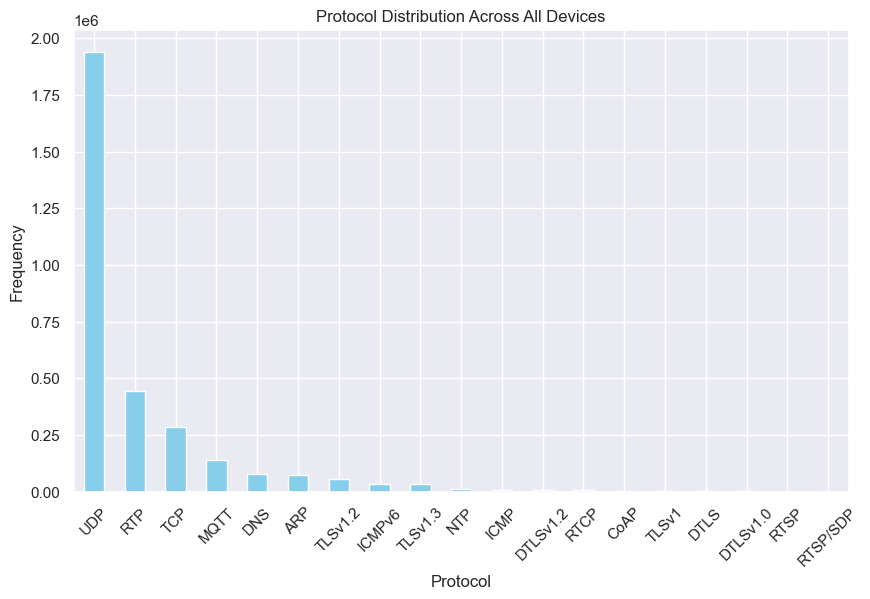

In [4]:
# Load protocol data
data = pd.read_csv("/Users/c22105357/Documents/gotham-network-packet-labeller/data/raw/normal/all_protocol_data.txt")

# Count occurrences of each protocol
protocol_counts = data['protocol'].value_counts()
sns.set_theme(style="darkgrid", palette="deep")
# Plot protocol distribution
plt.figure(figsize=(10, 6))
protocol_counts.plot(kind='bar', color='skyblue')
plt.title("Protocol Distribution Across All Devices")
plt.xlabel("Protocol")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.savefig("network_traffic_metrics_4.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Load the flow data
data = pd.read_csv("/Users/c22105357/Documents/gotham-network-packet-labeller/data/raw/normal/all_flow_data_cleaned.txt")
data = data[~(data.src_ip.isin(['ICMPv6', 'ARP']))]

# Fill any missing values in port columns (due to UDP or TCP-only packets)
data['src_port'].fillna(-1, inplace=True)
data['dst_port'].fillna(-1, inplace=True)

# Identify unique flows by grouping
# A flow is identified by src_ip, dst_ip, src_port, dst_port, and protocol
data['timestamp'] = data['timestamp'].astype(float)
flows = data.groupby(['src_ip', 'dst_ip', 'src_port', 'dst_port', 'protocol'])

# Calculate flow duration
flow_durations = flows['timestamp'].agg(['min', 'max', 'count'])
flow_durations['duration'] = flow_durations['max'] - flow_durations['min']
flow_durations['count'] = flow_durations['count']

# Calculate total counts and average duration of flows
total_flows = flow_durations.shape[0]
average_duration = flow_durations['duration'].mean()

# Print results
print(f"Total Number of Flows: {total_flows}")
print(f"Average Flow Duration: {average_duration:.2f} seconds")

# Optional: Histogram of flow durations
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(flow_durations['duration'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Network Flow Durations")
plt.xlabel("Duration (seconds)")
plt.ylabel("Frequency")
plt.show()

Total Number of Flows: 119239
Average Flow Duration: 47.07 seconds


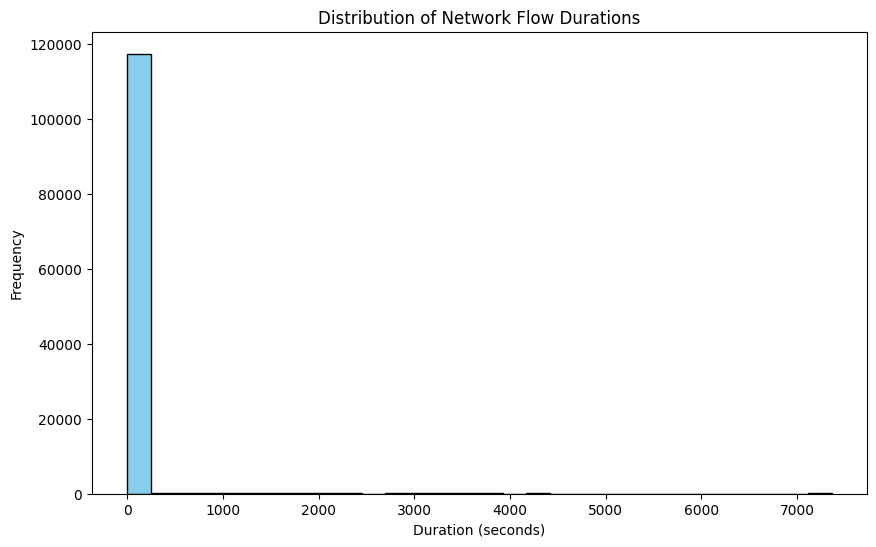

In [12]:
data = pd.read_csv("/Users/c22105357/Documents/gotham-network-packet-labeller/data/raw/normal/all_flow_data.txt", sep=";")

data.dropna(axis=0, inplace=True)

# Identify unique flows by grouping
# A flow is identified by src_ip, dst_ip, src_port, dst_port, and protocol
data['timestamp'] = data['timestamp'].astype(float)
flows = data.groupby(['device', 'src_ip', 'dst_ip', 'protocol', 'src_port', 'dst_port'])

# Calculate flow duration
flow_durations = flows['timestamp'].agg(['min', 'max', 'count'])
flow_durations['duration'] = flow_durations['max'] - flow_durations['min']
flow_durations['count'] = flow_durations['count']

# Calculate total counts and average duration of flows
total_flows = flow_durations.shape[0]
average_duration = flow_durations['duration'].mean()

# Print results
print(f"Total Number of Flows: {total_flows}")
print(f"Average Flow Duration: {average_duration:.2f} seconds")

# Optional: Histogram of flow durations
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(flow_durations['duration'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Network Flow Durations")
plt.xlabel("Duration (seconds)")
plt.ylabel("Frequency")
plt.show()

In [19]:
packet_counts_per_flow = flows.size().reset_index(name='packet_count')

In [20]:
packet_counts_per_flow

,device,src_ip,dst_ip,protocol,src_port,dst_port,packet_count
0,iotsim-air-quality-1_0-0_to_OpenvSwitch-25_1-0...,192.168.0.2,192.168.18.17,DNS,53.0,32818.0,1
1,iotsim-air-quality-1_0-0_to_OpenvSwitch-25_1-0...,192.168.0.2,192.168.18.17,DNS,53.0,32827.0,1
2,iotsim-air-quality-1_0-0_to_OpenvSwitch-25_1-0...,192.168.0.2,192.168.18.17,DNS,53.0,32876.0,2
3,iotsim-air-quality-1_0-0_to_OpenvSwitch-25_1-0...,192.168.0.2,192.168.18.17,DNS,53.0,32970.0,2
4,iotsim-air-quality-1_0-0_to_OpenvSwitch-25_1-0...,192.168.0.2,192.168.18.17,DNS,53.0,33068.0,1
...,...,...,...,...,...,...,...
119234,iotsim-stream-consumer-2_0-0_to_OpenvSwitch-30...,"192.168.17.18,192.168.1.2","192.168.1.2,192.168.17.18",ICMP,8000.0,19882.0,2
119235,iotsim-stream-consumer-2_0-0_to_OpenvSwitch-30...,"192.168.17.18,192.168.1.2","192.168.1.2,192.168.17.18",ICMP,8000.0,21956.0,1
119236,iotsim-stream-consumer-2_0-0_to_OpenvSwitch-30...,"192.168.17.18,192.168.1.2","192.168.1.2,192.168.17.18",ICMP,8000.0,22792.0,2
119237,iotsim-stream-consumer-2_0-0_to_OpenvSwitch-30...,"192.168.17.18,192.168.1.2","192.168.1.2,192.168.17.18",ICMP,8000.0,26058.0,2


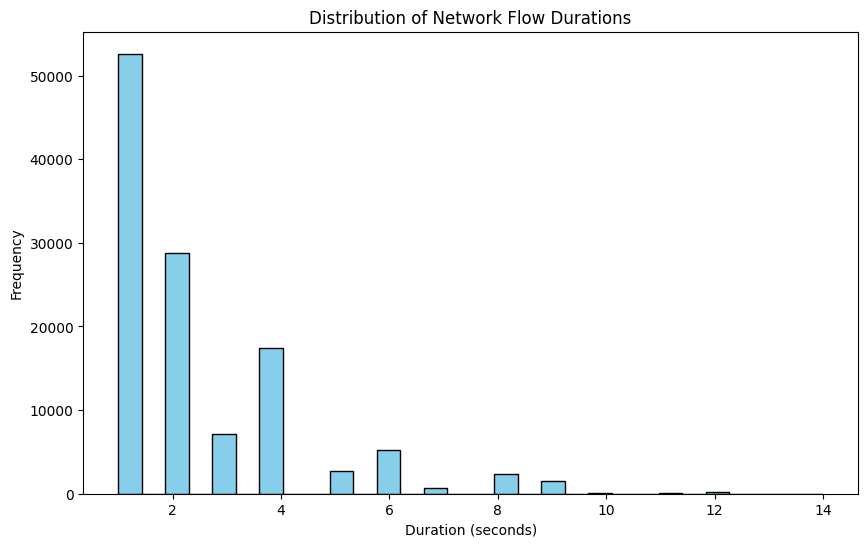

In [39]:
a = packet_counts_per_flow[(packet_counts_per_flow['packet_count'] < 15)]

plt.figure(figsize=(10, 6))
plt.hist(a['packet_count'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Network Flow Durations")
plt.xlabel("Duration (seconds)")
plt.ylabel("Frequency")
plt.show()

In [37]:
(packet_counts_per_flow['packet_count'] < 25).sum()

np.int64(118984)

In [41]:
packet_counts_per_flow.describe()

,src_port,dst_port,packet_count
count,119239.000000,119239.000000,119239.000000
mean,25708.735372,23347.500767,25.308691
std,23232.407695,22877.149586,2892.777297
min,53.000000,53.000000,1.000000
25%,123.000000,123.000000,1.000000
50%,34299.000000,8883.000000,2.000000
75%,47592.500000,45776.500000,4.000000
max,60999.000000,60999.000000,596624.000000
